In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir('../../')

In [3]:
from src.numpy_encode import *
from src.utils.file_processing import process_all, process_file
from src.config import *
from src.music_transformer import *

## Example notebook explaining how to encode midi to numpy array and train with fastai

Numpy format 

In [4]:
data_path = Path('data')

# Location of your midi files
midi_path = data_path/'midi'
midi_path.mkdir(parents=True, exist_ok=True)

# Location of transformed midi to numpy dataset
numpy_path = data_path/'numpy'
numpy_path.mkdir(parents=True, exist_ok=True)

data_save_name = 'musicitem_data_save.pkl'

## 1. Gather midi dataset

Make sure all your midi data is in `musicautobot/data/midi` directory

Here's a pretty good dataset with lots of midi data:  
https://www.reddit.com/r/datasets/comments/3akhxy/the_largest_midi_collection_on_the_internet/

Download the folder and unzip it to `data/midi`

## 3. Create dataset from encoded files

In [5]:
midi_files = get_files(midi_path, '.mid', recurse=True); len(midi_files)

18

In [6]:
processors = [Midi2ItemProcessor()]
data = MusicDataBunch.from_files(midi_files, numpy_path, processors=processors)
data.save(data_save_name)

In [7]:
data.one_batch()

(tensor([[ 78, 139,  61,  ..., 139,   8, 139],
         [ 78, 139,  61,  ..., 139,   8, 139],
         [ 78, 139,  61,  ..., 139,   8, 139],
         ...,
         [ 78, 139,  61,  ..., 139,   8, 139],
         [ 78, 139,  61,  ..., 139,   8, 139],
         [ 78, 139,  61,  ..., 139,   8, 139]]),
 tensor([[139,  61, 145,  ...,   8, 139,  88],
         [139,  61, 145,  ...,   8, 139,  88],
         [139,  61, 145,  ...,   8, 139,  88],
         ...,
         [139,  61, 145,  ...,   8, 139,  88],
         [139,  61, 145,  ...,   8, 139,  88],
         [139,  61, 145,  ...,   8, 139,  88]]))

## 4. Load Model

In [8]:
batch_size = 1
data = load_data(numpy_path, data_save_name, bs=batch_size)
vocab = data.vocab

In [9]:
config = default_config()
learn = music_model_learner(data, config.copy())

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,3.425351,3.616363,0.451429,00:07
1,2.864326,3.746772,0.451429,00:06
2,2.579428,3.194273,0.451429,00:06
3,2.541702,3.441998,0.451429,00:06


## 5. Prediction time

In [11]:
midi_files = get_files(data_path, '.mid', recurse=True)
midi_file = midi_files[0]; midi_file

PosixPath('data/midi/examples/Levels - Avicii - Verse.mid')

In [12]:
item = MusicItem.from_file(midi_file, vocab);

Only send a few notes 

In [13]:
seed_len = 4
seed_item = item.trim_to_beat(seed_len)

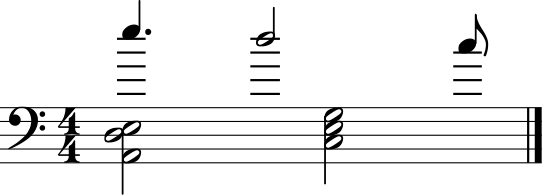

In [14]:
seed_item.show()

Here's what the seed sounds like:

In [15]:
seed_item.play()

### Start Predictions:

In [16]:
pred = learn.predict(seed_item, n_words=100)

Seed - used for prediction

Prediction

Non midi note detected. Only returning valid portion. Index, seed 9 (48, 2)


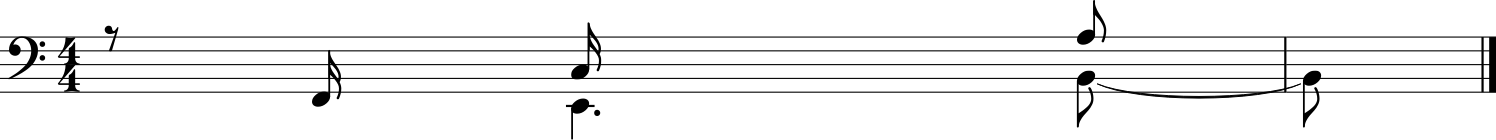

In [17]:
# Prediction
pred.show()

In [18]:
pred.play()